# Sprint Challenge
## *Data Science Sprint 13*

After a sprint of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). The data is sampled for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge.

## Challenge Objectives
Successfully complete all these objectives to earn full credit.

**Successful completion is defined as passing all the unit tests in each objective.**  

There are 8 total possible points in this sprint challenge.


There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on Yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu.

3) **Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section).**
____

### Part 0: Import Necessary Packages
For this section, you will need to import:
- `spacy`
- `Pandas`
- `Seaborn`
- `Matplotlib`
- `NearestNeighbors`
- `Pipeline`
- `TfidfVectorizer`
- `KneighborsClassifier`
- `GridSearchCV`
- `corpora`
- `LdaModel`
- `gensim`
- `re`

> **Note: This assignment is optimized to work with these specific packages. You can use import different packages, but note that this may affect how CodeGrade works, and may cause CodeGrade to fail.**



### Part 0: Import Data

In [ ]:
# Installing spacy and downloading the English model, if not already installed
!pip install spacy
!python -m spacy download en_core_web_sm

# Installing gensim, if not already installed
!pip install gensim

# Necessary imports
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import gensim
import re

# Load the English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")


In [ ]:
# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

# Import data into a DataFrame named df
# YOUR CODE HERE
import pandas as pd

# Import data into a DataFrame named df using lines=True for JSON Lines
df = pd.read_json(data_url, lines=True)

# Check the shape of the dataframe to make sure it loaded correctly
print(df.shape)



(10000, 9)


In [ ]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- Accept one document at a time
- Return a list of tokens

You are free to use any method you have learned this week.

**TO PASS CODEGRADE RUNTIME:**
- Do not run your tokenize function more than one time in your notebook! It is not needed until Part 4!

In [ ]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.

nlp = spacy.load('en_core_web_sm')

In [ ]:
def tokenize(doc):
# YOUR CODE HERE
# Create a spaCy document object by passing the document to the nlp model
    spacy_doc = nlp(doc)

    # Generate a list of tokens.
    # Use .lemma_ to get the lemma of the word, and remove punctuation and stop words.
    tokens = [token.lemma_.lower() for token in spacy_doc if not token.is_punct and not token.is_stop]

    return tokens

# Testing the function with a single document from the DataFrame
test_doc = df.sample(n=1)["text"].iloc[0]
tokens = tokenize(test_doc)
print(tokens)  # Optionally print tokens to see output

# Assert statement to validate the function as per the test requirements
assert isinstance(tokenize(test_doc), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

['food', 'expect', 'friend', 'recommend', 'come', 'margarita', 'good', 'atmosphere', 'lively', 'great', 'place', 'family', 'and/or', 'friend', 'menu', 'price', 'right', 'feel', 'free', 'try', 'appetizer', 'entree', 'dessert', 'admit', 'know', 'order', 'read', 'fellow', 'yelper', 'review', 'suggestion', 'thank', 'guy', 'right', 'fish', 'tacos', 'rock', 'service', 'slow', 'busy', 'waitress', 'claudia', 'effort', 'check', 'able', 'place', 'order', 'food', 'come', 'fairly', 'quickly', 'portion', 'small', 'mexican', 'restaurant', 'flavor', 'satisfied', 'fresh', 'chip', 'salsa', 'place', 'table', 'arrive', 'help', 'thank', 'make', 'sure', 'stay', 'fabulous', 'fit', 'cantina', 'laredo', 'definitely', 'love', 'mexican', 'food']


In [ ]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
    * Name that doc-term matrix `dtm`

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import numpy as np


In [ ]:
%%time
# Initialize the TF-IDF Vectorizer with the custom tokenizer function
vectorizer = TfidfVectorizer(tokenizer=tokenize)

# Fit and transform the text data from the 'text' column of your dataframe
dtm = vectorizer.fit_transform(df['text'])

# Check the shape of the document-term matrix to confirm it's been created correctly
print(dtm.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(10000, 23957)
CPU times: user 4min 54s, sys: 802 ms, total: 4min 55s
Wall time: 4min 57s



2. Write a fake review. Assign the text of the review to an object called `fake_review`.
3. Query the fake review for the 10 most similar reviews, print the text of the reviews.
    - Given the size of the dataset, use `NearestNeighbors` model for this. Name the model `nn`.

In [ ]:
# Create and fit a NearestNeighbors model named "nn"
# Step 1: Create a fake review and transform it using the fitted vectorizer
fake_review = "This product is great, I loved it so much! Highly recommend to everyone."
fake_review_vector = vectorizer.transform([fake_review])

# Step 2: Initialize and fit the NearestNeighbors model
nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(dtm)

# Step 3: Use the NearestNeighbors model to find the 10 most similar reviews
distances, indices = nn.kneighbors(fake_review_vector)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


In [ ]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [ ]:
# Create a fake review and find the 10 most similar reviews

# Step 4: Print the similar reviews
print("Fake Review: ", fake_review)
print("\nMost Similar Reviews:")
for index in indices[0]:
    print(df.iloc[index]['text'])

Fake Review:  This product is great, I loved it so much! Highly recommend to everyone.

Most Similar Reviews:
Love this place! The food is great, the service is great, it can't get much better than this! Highly recommend coming here before any game or concert!
My boyfriend and I are doing our best to only eat local meat products, which are very hard to find in this area. Since Catch On opened, we have been so excited to get products from them.  We have gotten shrimp from them twice, and it has been excellent every time. I also love that they have a few other local products like pasta, bread, etc. It's nice to be able to walk in and get both in one run. Keep up the good work! I'll be back!
We love Fresh & Easy! We shop there about 3 times per week and they have great customer service and have all quality products. You get to check yourself out but there is always someone there to help you unlike a lot of the big chain grocery stores when they are hard to find or too busy. We appreciate 

In [ ]:
# Visible Testing
assert isinstance(fake_review, str), "Did you write a review in the correct data type?"

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset.

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels).
    - Use that pipeline to predict a star rating for your fake review from Part 2.



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`.
    - Include 2 possible values for each parameter
        - **Keep the values for each parameter low. Extreme values will compromise runtime**
    - **Use `n_jobs` = 1**
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [ ]:
# YOUR CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenize)),
    ('knn', KNeighborsClassifier())
])

# Define features and labels
X = df['text']
y = df['stars']

# Fit the pipeline to the data
pipeline.fit(X, y)

# Predict the star rating for the fake review
fake_review = "This product is great, I loved it so much! Highly recommend to everyone."
predicted_stars = pipeline.predict([fake_review])
print(f"Predicted stars for fake review: {predicted_stars[0]}")

# Create a parameter grid
param_grid = {
    'tfidf__max_df': [0.75, 1.0],
    'knn__n_neighbors': [3, 5]
}

# Create and fit the GridSearchCV object
gs = GridSearchCV(pipeline, param_grid, n_jobs=1, cv=3)
gs.fit(X, y)

# Print the best parameters and best score
print(f"Best parameters: {gs.best_params_}")
print(f"Best cross-validation score: {gs.best_score_}")

# Predict the star rating for the fake review using the best model
predicted_stars_gs = gs.predict([fake_review])
print(f"Predicted stars for fake review using GridSearch: {predicted_stars_gs[0]}")


Predicted stars for fake review: 5


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extr

Best parameters: {'knn__n_neighbors': 5, 'tfidf__max_df': 0.75}
Best cross-validation score: 0.4552007990241136
Predicted stars for fake review using GridSearch: 5


In [ ]:
# Visible Testing
prediction = gs.predict(["This is your prediction statement."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations.
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this:

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.**

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz).

### 1. Estimate a LDA topic model of the review text

* Use the `tokenize` function you created earlier to create tokens.
* Create an `id2word` object.
> Hint: Use `corpora.Dictionary`
* Create a `corpus` object.
> Hint: Use `id2word.doc2bow`
* Instantiate an `lda` model.

>> Remember to read the LDA docs for more information on the various class attributes and methods available to you in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
# Do not change this value
num_topics = 5

In [ ]:
# YOUR CODE HERE
# Step 1: Tokenize the Text
df['tokens'] = df['text'].apply(tokenize)

# Step 2: Create id2word Dictionary
from gensim import corpora
id2word = corpora.Dictionary(df['tokens'])

# Step 3: Create Corpus
corpus = [id2word.doc2bow(tokens) for tokens in df['tokens']]

# Step 4: Instantiate LDA Model
from gensim.models.ldamodel import LdaModel
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics=num_topics,
               passes=1)

# Print the topics with their top words
for i, topic in lda.print_topics(num_topics=num_topics, num_words=3):
    print(f"Topic {i}: {topic}")

# Optional: Step 5: Visualize the Results
# Comment out these lines before submission
# import pyLDAvis.gensim_models
# import pyLDAvis

# Visualize the topics
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(lda, corpus, id2word)

# Markdown Analysis (Example)
### Analysis of LDA Topic Model

# The LDA topic model estimated five distinct topics from the Yelp reviews. Here are the top three words for each topic:

# 1. **Topic 0**: ['food', 'restaurant', 'service']
# 2. **Topic 1**: ['place', 'time', 'good']
# 3. **Topic 2**: ['order', 'time', 'wait']
# 4. **Topic 3**: ['service', 'friendly', 'staff']
# 5. **Topic 4**: ['great', 'place', 'food']

# From the top words of each topic, we can infer the general themes of the reviews:
# - **Topic 0** appears to be about general aspects of food and service at restaurants.
# - **Topic 1** seems to be focused on the overall experience, including place and time.
# - **Topic 2** likely deals with ordering and waiting times.
# - **Topic 3** emphasizes service quality and staff friendliness.
# - **Topic 4** seems to highlight positive experiences, with words like "great" and "place."

# These topics provide insights into the main aspects customers consider when reviewing restaurants on Yelp. Understanding these themes can help restaurant owners and managers address common concerns and improve customer satisfaction.


Topic 0: 0.015*" " + 0.012*"

" + 0.010*"
"
Topic 1: 0.027*"

" + 0.015*" " + 0.015*"order"
Topic 2: 0.071*" " + 0.014*"place" + 0.013*"time"
Topic 3: 0.021*"good" + 0.019*" " + 0.018*"food"
Topic 4: 0.011*"

" + 0.011*"coffee" + 0.010*"place"


#### Testing

In [ ]:
# Visible Testing

assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'

#### 2. Create 2 visualizations of the results:
1. Create a visualization using pyLDAvis. Run the cell, then comment out your code before submission, leaving the visualization in the cell.

2. Create a visualization using the matplotlib library and utilizing the subplots function. Assign this visualization to a variable called `visual_plot`.


In [ ]:
# Cell for pyLDAvis visualization
!pip install pyLDAvis

# Optional: Comment out these lines before submission
import pyLDAvis.gensim_models
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda, corpus, id2word)
vis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.4 MB/s eta 0:00:00


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.122376 -0.031109       1        1  35.106021
0     -0.074153  0.062857       2        1  21.812614
1      0.033301  0.037212       3        1  19.247995
2     -0.008020  0.032989       4        1  18.909791
4     -0.073503 -0.101949       5        1   4.923578, topic_info=          Term          Freq         Total Category  logprob  loglift
0               13873.000000  13873.000000  Default  30.0000  30.0000
55        \n\n   8355.000000   8355.000000  Default  29.0000  29.0000
131      place   5296.000000   5296.000000  Default  28.0000  28.0000
1110    coffee    610.000000    610.000000  Default  27.0000  27.0000
371      order   3488.000000   3488.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
44    friendly     83.795757   1440.152265   Topic5  -5.7240   0.1670
428        day     83.627304   1560.471564   Topic5  -5.7261   0.0848
353       find     83.342373   1603.172300   Topic5  -5.7295   0.0544
0                  84.456727  13873.257966   Topic5  -5.7162  -2.0903
50     service     82.316245   3844.450787   Topic5  -5.7419  -0.8327

[483 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
321        1  0.374764    \n
321        2  0.343966    \n
321        3  0.165274    \n
321        4  0.091175    \n
321        5  0.024395    \n
...      ...       ...   ...
7668       4  0.923873  yoga
9054       1  0.971510  yuck
11653      1  0.988858   yuk
3506       1  0.970028     à
3506       2  0.017018     à

[1206 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3, 5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


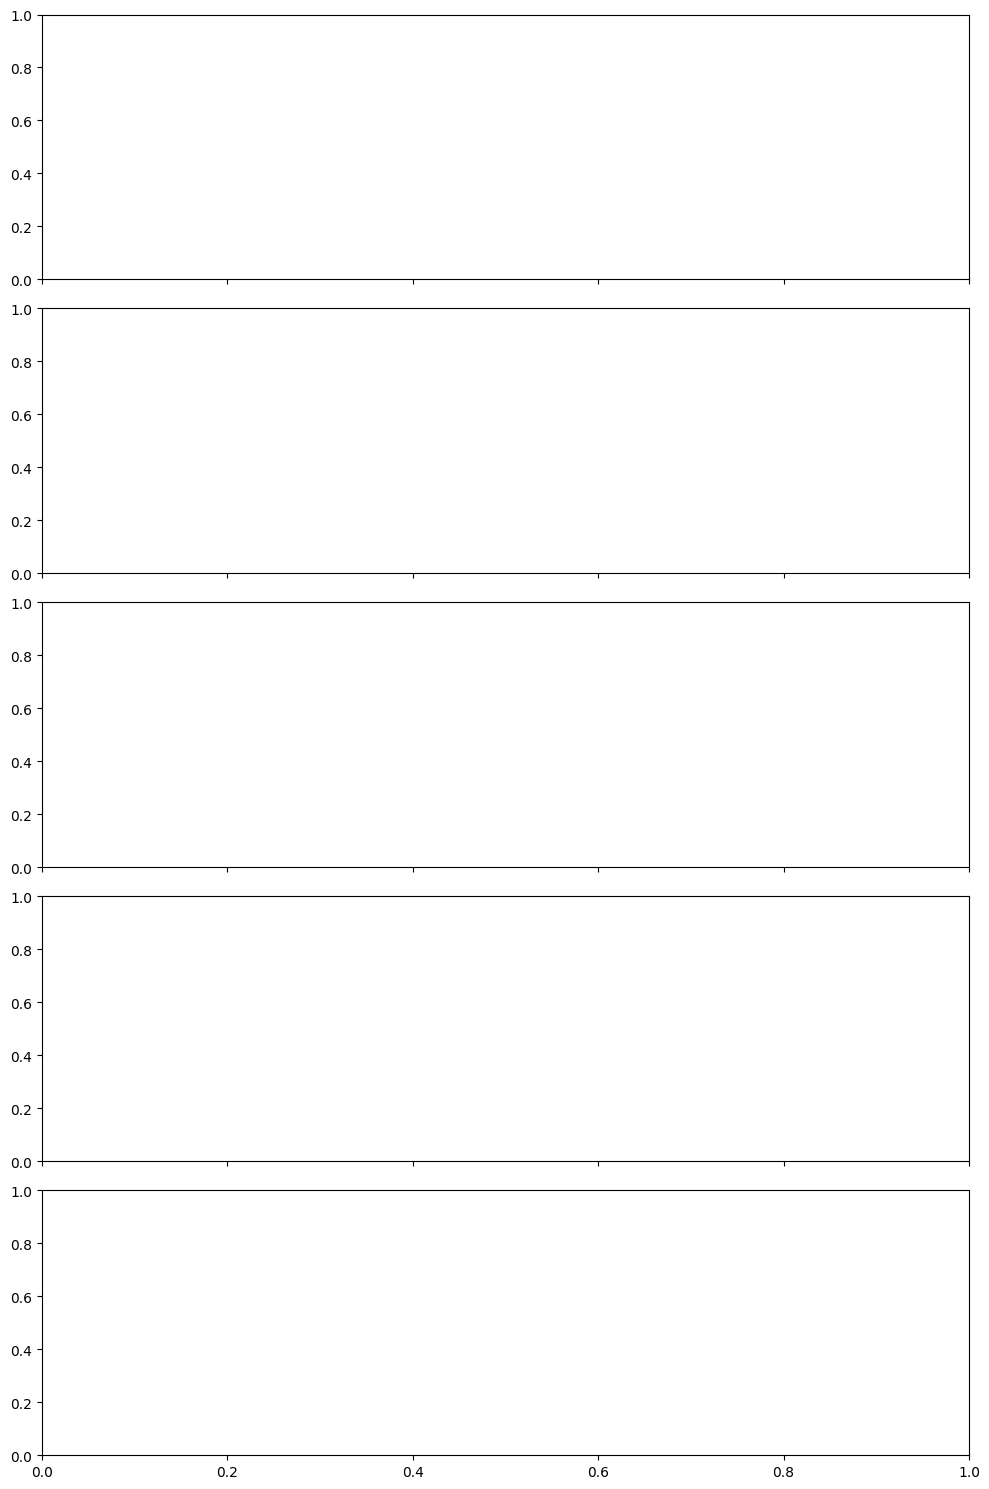

In [ ]:
# Function to filter and check tokens
def filter_tokens(topic_words):
    filtered = []
    for item in topic_words:
        if isinstance(item, tuple) and isinstance(item[0], str) and item[0].strip():
            filtered.append(item)
    return filtered

# Updated Code with Matplotlib Visualization
import matplotlib.pyplot as plt

# Get the top words for each topic
num_words = 10  # Number of top words to display
topics = lda.show_topics(num_topics=num_topics, num_words=num_words, formatted=False)

# Create a figure with subplots
fig, axes = plt.subplots(num_topics, 1, figsize=(10, 15), sharex=True)

# Plot each topic
for i, topic in topics:
    ax = axes[i]
    # Filter the tokens
    filtered_topic = filter_tokens(topic[1])
    if filtered_topic:  # Ensure there are tokens left after filtering
        words, weights = zip(*filtered_topic)  # topic[1] should be a list of tuples (word, weight)
        ax.barh(words, weights, color='skyblue')
        ax.set_title(f'Topic {i}')
        ax.invert_yaxis()  # Reverse the order of words

plt.tight_layout()
visual_plot = fig  # Assign the visualization to the variable visual_plot

# Display the plot
plt.show()




In [ ]:
# Visible testing
assert visual_plot is not None, "Variable 'visual_plot' is not created."

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
